## 신용카드 사용자 연체 예측 AI 경진대회

### 데이터 변수
 - gender: 성별
 - car: 차량 소유 여부
 - reality : 부동산 소유 여부
 - child num: 자녀 수
 - income_total : 연간 소득
 - income_type : 소득 분류=> ['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student']
 - edu_type : 교육 수준 => ['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']
 - family_type: 결혼 여부 => ['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']
 - house_type: 생활방식 => ['Municipal apartment', 'House / apartment', 'With parents','Co-op apartment', 'Rented apartment', 'Office apartment']
 - day_birth: 출생일 =>-1은 데이터 수집일 하루 전 출생,데이터수집당시 0으로부터 역으로 셈(하루단위)
 - day_employed: 업무 시작일. 하루단위로 계산. 양수는 고용x
 - flag_mobil: 휴대폰 소유 여부
 - work_phone: 업무용 전화 소유 여부
 - phone: 전화 소유 여부
 - email: 이메일 소유 여부
 - occyp_type: 직업 유형
 - family_size: 가족 규모
 - begin_month: 신용카드 발급월

종속변수 (credit) : 사용자의 신용카드 대금 연체를 기준으로 한 신용도. 낮을수록 높은 신용의 신용카드 사용자를 의미

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
submit=pd.read_csv('sample_submission.csv')
df_train=train.copy()
df_test=test.copy()

In [3]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [4]:
test.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
1,26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
2,26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0
3,26460,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0
4,26461,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2.0,-8.0


In [5]:
print(train.shape,test.shape)

(26457, 20) (10000, 19)


In [6]:
train.info() #occyp_type만 결측값 존재

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
index            26457 non-null int64
gender           26457 non-null object
car              26457 non-null object
reality          26457 non-null object
child_num        26457 non-null int64
income_total     26457 non-null float64
income_type      26457 non-null object
edu_type         26457 non-null object
family_type      26457 non-null object
house_type       26457 non-null object
DAYS_BIRTH       26457 non-null int64
DAYS_EMPLOYED    26457 non-null int64
FLAG_MOBIL       26457 non-null int64
work_phone       26457 non-null int64
phone            26457 non-null int64
email            26457 non-null int64
occyp_type       18286 non-null object
family_size      26457 non-null float64
begin_month      26457 non-null float64
credit           26457 non-null float64
dtypes: float64(4), int64(8), object(8)
memory usage: 4.0+ MB


### 결측치 확인

In [7]:
#결측치 제거
train.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

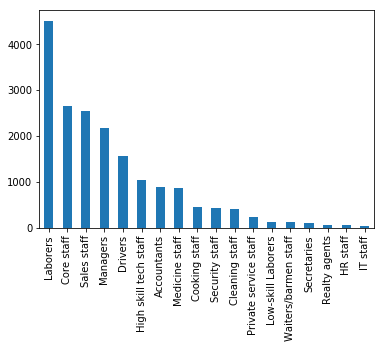

In [8]:
train['occyp_type'].value_counts().plot(kind='bar')
#laborers가 많은 편. core staff, sales staff,managers,drivers 순으로 나타남
#노동자들이 많은 타입

In [9]:
train['occyp_type'].value_counts()

Laborers                 4512
Core staff               2646
Sales staff              2539
Managers                 2167
Drivers                  1575
High skill tech staff    1040
Accountants               902
Medicine staff            864
Cooking staff             457
Security staff            424
Cleaning staff            403
Private service staff     243
Low-skill Laborers        127
Waiters/barmen staff      124
Secretaries                97
Realty agents              63
HR staff                   62
IT staff                   41
Name: occyp_type, dtype: int64

## EDA

### 결측치 분석

In [10]:
non_occyp=df_train.loc[df_train['occyp_type'].isnull()]#직업유형이 없는 사람
occyp=df_train.dropna()#직업유형이 있는 사람(결측치 제거)

In [11]:
occyp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18286 entries, 1 to 26456
Data columns (total 20 columns):
index            18286 non-null int64
gender           18286 non-null object
car              18286 non-null object
reality          18286 non-null object
child_num        18286 non-null int64
income_total     18286 non-null float64
income_type      18286 non-null object
edu_type         18286 non-null object
family_type      18286 non-null object
house_type       18286 non-null object
DAYS_BIRTH       18286 non-null int64
DAYS_EMPLOYED    18286 non-null int64
FLAG_MOBIL       18286 non-null int64
work_phone       18286 non-null int64
phone            18286 non-null int64
email            18286 non-null int64
occyp_type       18286 non-null object
family_size      18286 non-null float64
begin_month      18286 non-null float64
credit           18286 non-null float64
dtypes: float64(4), int64(8), object(8)
memory usage: 2.9+ MB


In [12]:
non_occyp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8171 entries, 0 to 26453
Data columns (total 20 columns):
index            8171 non-null int64
gender           8171 non-null object
car              8171 non-null object
reality          8171 non-null object
child_num        8171 non-null int64
income_total     8171 non-null float64
income_type      8171 non-null object
edu_type         8171 non-null object
family_type      8171 non-null object
house_type       8171 non-null object
DAYS_BIRTH       8171 non-null int64
DAYS_EMPLOYED    8171 non-null int64
FLAG_MOBIL       8171 non-null int64
work_phone       8171 non-null int64
phone            8171 non-null int64
email            8171 non-null int64
occyp_type       0 non-null object
family_size      8171 non-null float64
begin_month      8171 non-null float64
credit           8171 non-null float64
dtypes: float64(4), int64(8), object(8)
memory usage: 1.3+ MB


In [13]:
#train=train.drop('occyp_type',axis=0)
#test=test.drop('occyp_type',axis=0)

In [14]:
non_occyp.head() #occyp_type이 없는 사람

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
8,8,M,Y,Y,1,180000.0,Commercial associate,Higher education,Married,House / apartment,-15131,-1466,1,0,0,1,NaN,3.0,-38.0,2.0
14,14,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22922,365243,1,0,1,0,NaN,1.0,-41.0,2.0
18,18,F,N,Y,0,216000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23113,365243,1,0,0,0,NaN,2.0,-37.0,2.0
19,19,F,N,Y,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,-13727,-6031,1,0,0,0,NaN,2.0,-7.0,2.0


In [15]:
occyp.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0
5,5,F,N,Y,2,270000.0,Working,Secondary / secondary special,Married,House / apartment,-13413,-4996,1,0,0,1,High skill tech staff,4.0,-18.0,1.0


In [16]:
occyp.loc[occyp['DAYS_EMPLOYED']>0]#1이 없음
#전부다 고용된 상태임

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit


In [17]:
non_occyp['DAYS_EMPLOYED'].value_counts()
#양수인 부분이 4438개->고용된 사람과 그렇지 않은 사람이 존재한다.

 365243    4438
-302         25
-1613        21
-2014        21
-3079        21
-5639        20
-1751        20
-137         19
-5521        16
-1315        16
-135         15
-4834        15
-229         14
-2339        14
-3322        14
-2501        14
-15038       14
-2654        13
-1202        13
-170         13
-469         13
-422         13
-7627        13
-3458        12
-1160        12
-1113        12
-3668        12
-901         12
-4943        12
-2065        12
           ... 
-4089         1
-7953         1
-5910         1
-1844         1
-3592         1
-2074         1
-3935         1
-1892         1
-1904         1
-3967         1
-3999         1
-5866         1
-3604         1
-184          1
-5754         1
-5706         1
-1620         1
-1640         1
-1644         1
-1648         1
-1656         1
-917          1
-2870         1
-1680         1
-7738         1
-873          1
-4029         1
-825          1
-3608         1
-2051         1
Name: DAYS_EMPLOYED, Len

In [18]:
non_occyp['employeed']=[1 if t<0 else 0 for t in list(non_occyp['DAYS_EMPLOYED'])]

C:\Users\zzang\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
non_occyp.head()#양수면 0,음수면 1

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,employeed
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,...,-4709,1,0,0,0,NaN,2.0,-6.0,1.0,1
8,8,M,Y,Y,1,180000.0,Commercial associate,Higher education,Married,House / apartment,...,-1466,1,0,0,1,NaN,3.0,-38.0,2.0,1
14,14,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,...,365243,1,0,1,0,NaN,1.0,-41.0,2.0,0
18,18,F,N,Y,0,216000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,365243,1,0,0,0,NaN,2.0,-37.0,2.0,0
19,19,F,N,Y,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,...,-6031,1,0,0,0,NaN,2.0,-7.0,2.0,1


In [20]:
occyp['employeed']=1

C:\Users\zzang\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
occyp.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,employeed
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,...,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0,1
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,...,-4434,1,0,1,0,Managers,2.0,-22.0,2.0,1
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0,1
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,...,-2105,1,0,0,0,Managers,2.0,-26.0,2.0,1
5,5,F,N,Y,2,270000.0,Working,Secondary / secondary special,Married,House / apartment,...,-4996,1,0,0,1,High skill tech staff,4.0,-18.0,1.0,1


결측치에 해당하는 값을 조사한 결과 고용이 안 된 사람과 된 사람 모두 포함되지만 결측값이 없는 상태는 모두 고용이 된 사람들이다.

In [22]:
#결측값 중 고용된 사람 중에서 소득분류 분포
non_occyp.loc[non_occyp['employeed']==1]['income_type'].value_counts()

Working                 2312
Commercial associate    1026
State servant            392
Pensioner                  2
Student                    1
Name: income_type, dtype: int64

일하는 사람은 2312,상업 제휴를 하는 사람은 1026,공무원은 392,학생은 1명,연금수령자는 2명(2명은 정년퇴직?)

In [23]:
non_occyp.loc[non_occyp['employeed']==0]['income_type'].value_counts()
#고용되지 않은 사람 중에는 연금을 수령한 사람들이다.

Pensioner    4438
Name: income_type, dtype: int64

In [24]:
print(occyp.shape,non_occyp.shape)

(18286, 21) (8171, 21)


In [25]:
non_occyp.loc[(non_occyp['employeed']==0)] #4438개,고용되지 않은 사람 수

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,employeed
14,14,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,...,365243,1,0,1,0,NaN,1.0,-41.0,2.0,0
18,18,F,N,Y,0,216000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,365243,1,0,0,0,NaN,2.0,-37.0,2.0,0
21,21,F,N,N,0,157500.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,365243,1,0,1,0,NaN,2.0,-7.0,2.0,0
24,24,F,N,N,0,202500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,...,365243,1,0,1,0,NaN,1.0,-5.0,2.0,0
46,46,F,N,N,0,135000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,...,365243,1,0,1,0,NaN,1.0,-24.0,2.0,0
48,48,F,N,Y,0,99000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,365243,1,0,0,0,NaN,2.0,-4.0,2.0,0
52,52,F,N,Y,0,54000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,365243,1,0,1,0,NaN,2.0,-37.0,2.0,0
58,58,F,N,Y,0,144000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,365243,1,0,0,0,NaN,2.0,-23.0,2.0,0
59,59,F,N,Y,0,360000.0,Pensioner,Higher education,Married,House / apartment,...,365243,1,0,1,0,NaN,2.0,-25.0,2.0,0
60,60,M,Y,Y,0,112500.0,Pensioner,Secondary / secondary special,Separated,House / apartment,...,365243,1,0,0,0,NaN,1.0,-1.0,1.0,0


In [26]:
non_occyp.loc[(non_occyp['employeed']==0),'occyp_type']='inocc'
#고용되지 않은 사람은 inocc로 처리.

C:\Users\zzang\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


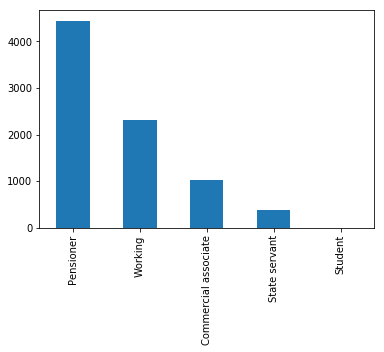

In [27]:
non_occyp['income_type'].value_counts().plot(kind='bar')
#결측치가 들어간 데이터 내 소득 분류는 연금을 받은 사람들이 많다.

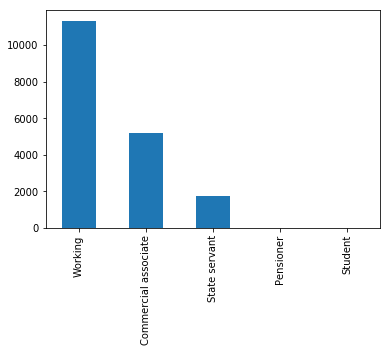

In [28]:
occyp['income_type'].value_counts().plot(kind='bar')

In [29]:
non_occyp.loc[non_occyp['income_type']=='Pensioner']
#연금을 받는 사람들 대상으로 조사 결과 income_total은 결측치가 없다

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,employeed
14,14,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,...,365243,1,0,1,0,inocc,1.0,-41.0,2.0,0
18,18,F,N,Y,0,216000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,365243,1,0,0,0,inocc,2.0,-37.0,2.0,0
21,21,F,N,N,0,157500.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,365243,1,0,1,0,inocc,2.0,-7.0,2.0,0
24,24,F,N,N,0,202500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,...,365243,1,0,1,0,inocc,1.0,-5.0,2.0,0
46,46,F,N,N,0,135000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,...,365243,1,0,1,0,inocc,1.0,-24.0,2.0,0
48,48,F,N,Y,0,99000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,365243,1,0,0,0,inocc,2.0,-4.0,2.0,0
52,52,F,N,Y,0,54000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,365243,1,0,1,0,inocc,2.0,-37.0,2.0,0
58,58,F,N,Y,0,144000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,365243,1,0,0,0,inocc,2.0,-23.0,2.0,0
59,59,F,N,Y,0,360000.0,Pensioner,Higher education,Married,House / apartment,...,365243,1,0,1,0,inocc,2.0,-25.0,2.0,0
60,60,M,Y,Y,0,112500.0,Pensioner,Secondary / secondary special,Separated,House / apartment,...,365243,1,0,0,0,inocc,1.0,-1.0,1.0,0


### income_type마다 occyp_type의 차이

In [30]:
occyp['income_type'].unique()
#밑의 분석을 통해서 각 income_type마다 공통적으로 나오는 부분이
#core staff 또는 laborers

array(['Commercial associate', 'Working', 'State servant', 'Pensioner',
       'Student'], dtype=object)

In [31]:
occyp.loc[occyp['income_type']=='State servant']['occyp_type'].value_counts()
#core staff가 많음,medicine staff,managers가 다음 순

Core staff               655
Medicine staff           274
Managers                 226
High skill tech staff    148
Laborers                 142
Drivers                   87
Accountants               69
Cooking staff             41
Waiters/barmen staff      31
Secretaries               22
Cleaning staff            16
Private service staff     15
Security staff            14
Sales staff               10
IT staff                   6
HR staff                   3
Low-skill Laborers         3
Name: occyp_type, dtype: int64

In [32]:
occyp.loc[occyp['income_type']=='Working']['occyp_type'].value_counts()
#laborers,sales staff,core staff가 많은 편

Laborers                 3290
Sales staff              1669
Core staff               1376
Managers                 1094
Drivers                  1069
High skill tech staff     586
Accountants               469
Medicine staff            462
Cooking staff             324
Cleaning staff            307
Security staff            272
Private service staff     132
Low-skill Laborers         91
Secretaries                61
Waiters/barmen staff       53
HR staff                   38
IT staff                   20
Realty agents              20
Name: occyp_type, dtype: int64

In [33]:
occyp.loc[occyp['income_type']=='Pensioner']['occyp_type'].value_counts()
#laborers=3,core staff=2

Laborers          3
Core staff        2
Drivers           1
Managers          1
Accountants       1
Medicine staff    1
Name: occyp_type, dtype: int64

In [34]:
occyp.loc[occyp['income_type']=='Commercial associate']['occyp_type'].value_counts()
#laborers,sales staff,managers,managers,core staff순

Laborers                 1075
Sales staff               860
Managers                  846
Core staff                609
Drivers                   418
Accountants               363
High skill tech staff     306
Security staff            138
Medicine staff            127
Private service staff      96
Cooking staff              92
Cleaning staff             80
Realty agents              43
Waiters/barmen staff       40
Low-skill Laborers         33
HR staff                   21
IT staff                   15
Secretaries                14
Name: occyp_type, dtype: int64

In [35]:
occyp.loc[occyp['income_type']=='Student']['occyp_type'].value_counts()
#학생일 경우 core staff나 laborers가 많음

Core staff    4
Laborers      2
Name: occyp_type, dtype: int64

In [36]:
pensioner=df_train.loc[(df_train['income_type']=='Pensioner')]
#연금을 받는 사람들 대상으로 조사 결과 income_total은 결측치가 없다
pensioner.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
14,14,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22922,365243,1,0,1,0,NaN,1.0,-41.0,2.0
18,18,F,N,Y,0,216000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23113,365243,1,0,0,0,NaN,2.0,-37.0,2.0
21,21,F,N,N,0,157500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21253,365243,1,0,1,0,NaN,2.0,-7.0,2.0
24,24,F,N,N,0,202500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22361,365243,1,0,1,0,NaN,1.0,-5.0,2.0
46,46,F,N,N,0,135000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-21100,365243,1,0,1,0,NaN,1.0,-24.0,2.0


In [37]:
pensioner.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       4440
family_size         0
begin_month         0
credit              0
dtype: int64

C:\Users\zzang\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


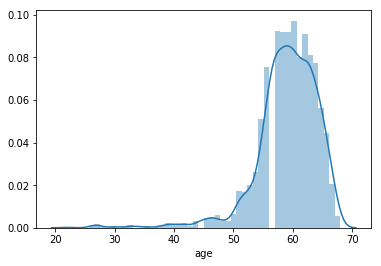

In [38]:
pensioner['age']=pensioner['DAYS_BIRTH']//-365 #연금 받는 사람들의 나이
pensioner[['income_total','age']]
sns.distplot(pensioner['age'])

연금을 받는 사람들은 50~70대에 밀집되어있다.

In [39]:
pensioner.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,age
14,14,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,...,365243,1,0,1,0,NaN,1.0,-41.0,2.0,62
18,18,F,N,Y,0,216000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,365243,1,0,0,0,NaN,2.0,-37.0,2.0,63
21,21,F,N,N,0,157500.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,365243,1,0,1,0,NaN,2.0,-7.0,2.0,58
24,24,F,N,N,0,202500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,...,365243,1,0,1,0,NaN,1.0,-5.0,2.0,61
46,46,F,N,N,0,135000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,...,365243,1,0,1,0,NaN,1.0,-24.0,2.0,57


In [40]:
pensioner.loc[pensioner['age']<40]['family_size'].value_counts()
#40대 미만에서 연금받는 사람 중 가족 수->2~3명이 대부분

3.0    21
2.0    14
1.0     7
5.0     5
Name: family_size, dtype: int64

In [41]:
pensioner.loc[pensioner['age']<40]['family_type'].value_counts()
#연금을 받는 사람들 대부분은 결혼한 상태

Married                 36
Single / not married     7
Civil marriage           3
Widow                    1
Name: family_type, dtype: int64

In [42]:
pensioner.loc[pensioner['age']<40]['house_type'].value_counts()
#주로 아파트에 거주한다.

House / apartment    45
With parents          2
Name: house_type, dtype: int64

In [43]:
pensioner.loc[pensioner['age']<40]['edu_type'].value_counts()
#40대 미만은 중◦고등학교(의무교육)이 최종학력이다.학위 취득자만 9명이다.

Secondary / secondary special    34
Higher education                  9
Lower secondary                   4
Name: edu_type, dtype: int64

In [44]:
pensioner.loc[pensioner['DAYS_EMPLOYED']<0][['edu_type','age']]
#고용된 사람 중 연금을 받은 사람은 28~55세로 다양하다,
#각각 학위를 받거나 고졸인 상태다.

,edu_type,age
1964,Higher education,33
5786,Secondary / secondary special,41
6695,Higher education,28
6743,Higher education,37
9793,Secondary / secondary special,56
10357,Secondary / secondary special,30
14356,Higher education,38
15682,Secondary / secondary special,55
17278,Secondary / secondary special,33
23227,Higher education,48


In [45]:
pensioner.loc[pensioner['DAYS_EMPLOYED']>0]['edu_type'].value_counts()
#연금을 받은 사람 중 고용이 안 된 사람의 최종학력은 중,고졸들이 많다.

Secondary / secondary special    3555
Higher education                  731
Lower secondary                   106
Incomplete higher                  45
Academic degree                     1
Name: edu_type, dtype: int64

In [46]:
pensioner['occyp_type'].value_counts()
#결측치 제외 값 중 가장 많은 부분이 labors,core staff.

Laborers          3
Core staff        2
Medicine staff    1
Managers          1
Accountants       1
Drivers           1
Name: occyp_type, dtype: int64

### test EDA

In [47]:
df_test.loc[(df_test['occyp_type'].isnull()) &(df_test['DAYS_EMPLOYED']>0)]['income_type'].value_counts()
#직업유형이 없는 사람 중 고용이 안 된 사람은 소득분류는 모두 연금을 받은 상태다

Pensioner    1697
Name: income_type, dtype: int64

In [48]:
non_occyp.columns

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'credit', 'employeed'],
      dtype='object')

In [49]:
df_test.loc[(df_test['occyp_type'].isnull()) &(df_test['DAYS_EMPLOYED']>0),'occyp_type']='inocc'

In [50]:
df_test.loc[(df_test['occyp_type'].isnull()) &(df_test['DAYS_EMPLOYED']<0)]['income_type'].value_counts()
#직업유형이 없는 사람 중 고용된 사람은 연금을 받은 사람이 2명,
#나머지는 working,상업 제휴,공무원이다.

Working                 885
Commercial associate    412
State servant           156
Pensioner                 2
Name: income_type, dtype: int64

In [51]:
df_test['age']=df_test['DAYS_BIRTH']//-365

In [52]:
df_test['employeed']=[1 if t<0 else 0 for t in list(df_test['DAYS_EMPLOYED'])]

In [53]:
df_test['age']=[t for t in list(df_test['age'])]

In [54]:
df_test.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,age,employeed
0,26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,...,365243,1,0,1,0,inocc,2.0,-60.0,60,0
1,26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,...,-8671,1,0,1,0,Core staff,2.0,-36.0,51,1
2,26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,...,-217,1,1,1,0,Laborers,2.0,-40.0,43,1
3,26460,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,-2531,1,1,0,0,Drivers,2.0,-41.0,52,1
4,26461,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,...,-9385,1,1,0,0,Managers,2.0,-8.0,48,1


In [55]:
#df_test=df_test.drop(['age','employeed'],axis=1)

### 중복데이터 처리

In [56]:
df=pd.concat([non_occyp,occyp]).sort_values(by='index')
df.head()#employeed 변수를 넣은 상태에서 다시 취합

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,employeed
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,...,-4709,1,0,0,0,NaN,2.0,-6.0,1.0,1
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,...,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0,1
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,...,-4434,1,0,1,0,Managers,2.0,-22.0,2.0,1
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0,1
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,...,-2105,1,0,0,0,Managers,2.0,-26.0,2.0,1


In [57]:
df.columns

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'credit', 'employeed'],
      dtype='object')

In [58]:
df.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       3733
family_size         0
begin_month         0
credit              0
employeed           0
dtype: int64

In [59]:
len(df.loc[df['occyp_type'].isnull()])#결측값 전체에서 고용되지 않은 상태의
#occyp_type에 inocc를 넣어서 뺀 값

3733

- 중복데이터 여부:다른 열은 같은데 begin_month만 달라서 제외
- 신용카드만 다르고 같은 사람은 아닌지?
- 동일인이어도 카드에 따라, 또 시점에 따라 연체 대금 연체 정도가 다를 수 있다.

In [60]:
duplicated=df.loc[df.duplicated(['gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size','begin_month'],keep=False)]#index,종속변수 credit 제외

In [61]:
duplicated.loc[duplicated['income_total']==157500.0].sort_values(by='DAYS_BIRTH')

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,employeed
24362,24362,F,N,Y,0,157500.0,Pensioner,Lower secondary,Married,House / apartment,...,365243,1,0,0,0,inocc,2.0,-24.0,2.0,0
8855,8855,F,N,Y,0,157500.0,Pensioner,Lower secondary,Married,House / apartment,...,365243,1,0,0,0,inocc,2.0,-18.0,0.0,0
15076,15076,F,N,Y,0,157500.0,Pensioner,Lower secondary,Married,House / apartment,...,365243,1,0,0,0,inocc,2.0,-18.0,2.0,0
15569,15569,F,N,Y,0,157500.0,Pensioner,Lower secondary,Married,House / apartment,...,365243,1,0,0,0,inocc,2.0,-24.0,0.0,0
2038,2038,F,Y,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,...,365243,1,0,0,0,inocc,2.0,-10.0,2.0,0
19472,19472,F,Y,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,...,365243,1,0,0,0,inocc,2.0,-10.0,2.0,0
16718,16718,M,Y,N,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,...,-14887,1,0,0,0,Laborers,2.0,-38.0,0.0,1
19145,19145,M,Y,N,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,...,-14887,1,0,0,0,Laborers,2.0,-38.0,1.0,1
15637,15637,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,365243,1,0,0,0,inocc,2.0,-15.0,2.0,0
1928,1928,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,365243,1,0,0,0,inocc,2.0,-15.0,2.0,0


In [62]:
duplicated.sort_values(by='DAYS_BIRTH').head(10)#생일별로 추출
#밑의 6행:begin_month빼고 다 같다.

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,employeed
11553,11553,F,N,Y,0,112500.0,Pensioner,Lower secondary,Married,House / apartment,...,365243,1,0,0,0,inocc,2.0,-50.0,2.0,0
11314,11314,F,N,Y,0,112500.0,Pensioner,Lower secondary,Married,House / apartment,...,365243,1,0,0,0,inocc,2.0,-50.0,2.0,0
1441,1441,M,Y,Y,0,180000.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,...,365243,1,0,0,0,inocc,2.0,-50.0,2.0,0
20250,20250,M,Y,Y,0,180000.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,...,365243,1,0,0,0,inocc,2.0,-50.0,2.0,0
7241,7241,F,N,Y,0,90000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,365243,1,0,0,0,inocc,2.0,-49.0,2.0,0
12966,12966,F,N,Y,0,90000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,365243,1,0,0,0,inocc,2.0,-52.0,2.0,0
19162,19162,F,N,Y,0,90000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,365243,1,0,0,0,inocc,2.0,-52.0,2.0,0
21722,21722,F,N,Y,0,90000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,365243,1,0,0,0,inocc,2.0,-49.0,2.0,0
989,989,F,N,Y,0,90000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,365243,1,0,0,0,inocc,2.0,-35.0,2.0,0
1056,1056,F,N,Y,0,90000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,365243,1,0,0,0,inocc,2.0,-35.0,2.0,0


In [63]:
len(duplicated) #index,credit만 제거

4497

In [64]:
df.loc[df.duplicated(['gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size'],keep=False)].sort_values(["DAYS_BIRTH","income_total"])
#begin_month,credit,index 제거->23208개

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,employeed
17245,17245,F,N,Y,0,76500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,...,365243,1,0,0,0,inocc,1.0,-55.0,0.0,0
18952,18952,F,N,Y,0,76500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,...,365243,1,0,0,0,inocc,1.0,-11.0,0.0,0
24279,24279,F,N,Y,0,76500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,...,365243,1,0,0,0,inocc,1.0,-49.0,0.0,0
17632,17632,F,N,Y,0,90000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,...,365243,1,0,0,0,inocc,1.0,-22.0,1.0,0
26112,26112,F,N,Y,0,90000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,...,365243,1,0,0,0,inocc,1.0,-34.0,1.0,0
15666,15666,F,N,Y,0,58500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,...,365243,1,0,1,0,inocc,1.0,-36.0,1.0,0
21815,21815,F,N,Y,0,58500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,...,365243,1,0,1,0,inocc,1.0,-18.0,1.0,0
957,957,F,N,N,0,126000.0,Pensioner,Higher education,Single / not married,House / apartment,...,365243,1,0,0,0,inocc,1.0,-51.0,0.0,0
10345,10345,F,N,N,0,126000.0,Pensioner,Higher education,Single / not married,House / apartment,...,365243,1,0,0,0,inocc,1.0,-46.0,2.0,0
1367,1367,F,N,N,0,90000.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,...,365243,1,0,0,0,inocc,1.0,-15.0,1.0,0


In [65]:
df.loc[df[df.columns.drop(["index",'begin_month'])].duplicated(keep=False)].sort_values(["DAYS_BIRTH","income_total"])
#총 20375개 중복

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,employeed
17245,17245,F,N,Y,0,76500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,...,365243,1,0,0,0,inocc,1.0,-55.0,0.0,0
18952,18952,F,N,Y,0,76500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,...,365243,1,0,0,0,inocc,1.0,-11.0,0.0,0
24279,24279,F,N,Y,0,76500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,...,365243,1,0,0,0,inocc,1.0,-49.0,0.0,0
17632,17632,F,N,Y,0,90000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,...,365243,1,0,0,0,inocc,1.0,-22.0,1.0,0
26112,26112,F,N,Y,0,90000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,...,365243,1,0,0,0,inocc,1.0,-34.0,1.0,0
15666,15666,F,N,Y,0,58500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,...,365243,1,0,1,0,inocc,1.0,-36.0,1.0,0
21815,21815,F,N,Y,0,58500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,...,365243,1,0,1,0,inocc,1.0,-18.0,1.0,0
1367,1367,F,N,N,0,90000.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,...,365243,1,0,0,0,inocc,1.0,-15.0,1.0,0
14913,14913,F,N,N,0,90000.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,...,365243,1,0,0,0,inocc,1.0,-29.0,1.0,0
11139,11139,F,N,Y,0,112500.0,Pensioner,Lower secondary,Married,House / apartment,...,365243,1,0,0,0,inocc,2.0,-45.0,2.0,0


데이콘에 나온 코드 활용

In [66]:
df[df[df.columns.drop("index")].duplicated(keep = False)].sort_values(["DAYS_BIRTH","income_total"])
#index만 뺐을 때 3155개

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,employeed
11314,11314,F,N,Y,0,112500.0,Pensioner,Lower secondary,Married,House / apartment,...,365243,1,0,0,0,inocc,2.0,-50.0,2.0,0
11553,11553,F,N,Y,0,112500.0,Pensioner,Lower secondary,Married,House / apartment,...,365243,1,0,0,0,inocc,2.0,-50.0,2.0,0
1441,1441,M,Y,Y,0,180000.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,...,365243,1,0,0,0,inocc,2.0,-50.0,2.0,0
20250,20250,M,Y,Y,0,180000.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,...,365243,1,0,0,0,inocc,2.0,-50.0,2.0,0
989,989,F,N,Y,0,90000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,365243,1,0,0,0,inocc,2.0,-35.0,2.0,0
1056,1056,F,N,Y,0,90000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,365243,1,0,0,0,inocc,2.0,-35.0,2.0,0
7241,7241,F,N,Y,0,90000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,365243,1,0,0,0,inocc,2.0,-49.0,2.0,0
12966,12966,F,N,Y,0,90000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,365243,1,0,0,0,inocc,2.0,-52.0,2.0,0
19162,19162,F,N,Y,0,90000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,365243,1,0,0,0,inocc,2.0,-52.0,2.0,0
21722,21722,F,N,Y,0,90000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,365243,1,0,0,0,inocc,2.0,-49.0,2.0,0


In [67]:
df[df.drop(['index','begin_month'],axis=1).duplicated(keep = False)].sort_values(by=["DAYS_BIRTH","income_total"])
#20375행 중복

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,employeed
17245,17245,F,N,Y,0,76500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,...,365243,1,0,0,0,inocc,1.0,-55.0,0.0,0
18952,18952,F,N,Y,0,76500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,...,365243,1,0,0,0,inocc,1.0,-11.0,0.0,0
24279,24279,F,N,Y,0,76500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,...,365243,1,0,0,0,inocc,1.0,-49.0,0.0,0
17632,17632,F,N,Y,0,90000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,...,365243,1,0,0,0,inocc,1.0,-22.0,1.0,0
26112,26112,F,N,Y,0,90000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,...,365243,1,0,0,0,inocc,1.0,-34.0,1.0,0
15666,15666,F,N,Y,0,58500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,...,365243,1,0,1,0,inocc,1.0,-36.0,1.0,0
21815,21815,F,N,Y,0,58500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,...,365243,1,0,1,0,inocc,1.0,-18.0,1.0,0
1367,1367,F,N,N,0,90000.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,...,365243,1,0,0,0,inocc,1.0,-15.0,1.0,0
14913,14913,F,N,N,0,90000.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,...,365243,1,0,0,0,inocc,1.0,-29.0,1.0,0
11139,11139,F,N,Y,0,112500.0,Pensioner,Lower secondary,Married,House / apartment,...,365243,1,0,0,0,inocc,2.0,-45.0,2.0,0


In [68]:
df[df.drop(["index","begin_month","credit"], axis = 1).duplicated(keep = False)].sort_values(by=["DAYS_BIRTH","income_total"])
#23208개 행 추출

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,employeed
17245,17245,F,N,Y,0,76500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,...,365243,1,0,0,0,inocc,1.0,-55.0,0.0,0
18952,18952,F,N,Y,0,76500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,...,365243,1,0,0,0,inocc,1.0,-11.0,0.0,0
24279,24279,F,N,Y,0,76500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,...,365243,1,0,0,0,inocc,1.0,-49.0,0.0,0
17632,17632,F,N,Y,0,90000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,...,365243,1,0,0,0,inocc,1.0,-22.0,1.0,0
26112,26112,F,N,Y,0,90000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,...,365243,1,0,0,0,inocc,1.0,-34.0,1.0,0
15666,15666,F,N,Y,0,58500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,...,365243,1,0,1,0,inocc,1.0,-36.0,1.0,0
21815,21815,F,N,Y,0,58500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,...,365243,1,0,1,0,inocc,1.0,-18.0,1.0,0
957,957,F,N,N,0,126000.0,Pensioner,Higher education,Single / not married,House / apartment,...,365243,1,0,0,0,inocc,1.0,-51.0,0.0,0
10345,10345,F,N,N,0,126000.0,Pensioner,Higher education,Single / not married,House / apartment,...,365243,1,0,0,0,inocc,1.0,-46.0,2.0,0
1367,1367,F,N,N,0,90000.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,...,365243,1,0,0,0,inocc,1.0,-15.0,1.0,0


index만하면 3155개, credit과 함께하면 4497개,begin_month,index를 하면 20375개,
index,credit,begin_month를 하면 23208개의 행이 중복된다.

In [69]:
duplicated_index=df[df[df.columns.drop("index")].duplicated(keep='last')].sort_values(["DAYS_BIRTH","income_total"])
#중복된 행은 하나만 남길 것

In [70]:
delete_index=set(df['index'].values)-set(duplicated_index['index'].values)
#중복값이 있는 항목 삭제한 인덱스

In [71]:
len(delete_index)

24823

In [72]:
df_unique=df.loc[list(delete_index)]#중복된 행만 제거

In [73]:
df_unique.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,employeed
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,...,-4709,1,0,0,0,NaN,2.0,-6.0,1.0,1
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,...,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0,1
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,...,-4434,1,0,1,0,Managers,2.0,-22.0,2.0,1
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0,1
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,...,-2105,1,0,0,0,Managers,2.0,-26.0,2.0,1


In [74]:
len(df_unique)

24823

In [75]:
df_unique.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       3446
family_size         0
begin_month         0
credit              0
employeed           0
dtype: int64

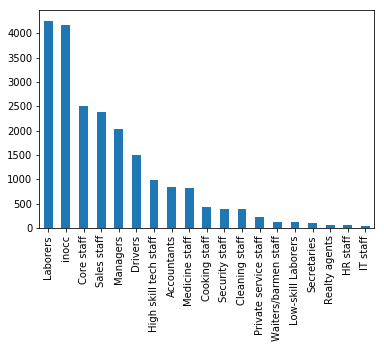

In [76]:
df_unique['occyp_type'].value_counts().plot(kind='bar')
#무직이 laborers 다음으로 많다

In [77]:
df_unique.loc[df_unique['occyp_type'].isnull()]['income_type'].value_counts()
#고용된 사람들 중에서 결측치값에 해당하는 부분에는 working이 많다.

Working                 2126
Commercial associate     950
State servant            367
Pensioner                  2
Student                    1
Name: income_type, dtype: int64

In [78]:
df_unique['age']=-df_unique['DAYS_BIRTH']//365.0

In [79]:
df_unique['employed_year']=[-t//365.0 if t<0 else t for t in list(df_unique['DAYS_EMPLOYED'])]

In [80]:
df_unique_deleted=df_unique.dropna()#중복제거 후 결측치 제거

In [81]:
len(df_unique_deleted) 

21377

In [82]:
df_unique.loc[(df_unique['income_type']=='Pensioner')&(df_unique['occyp_type'].isnull())]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,work_phone,phone,email,occyp_type,family_size,begin_month,credit,employeed,age,employed_year
6743,6743,F,Y,N,0,315000.0,Pensioner,Higher education,Married,House / apartment,...,1,1,0,NaN,2.0,-36.0,2.0,1,37,1.0
15682,15682,F,Y,Y,0,112500.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,0,1,0,NaN,2.0,-20.0,2.0,1,55,1.0


In [83]:
df_unique.loc[(df_unique['income_type']=='Pensioner')]['occyp_type'].value_counts()

inocc             4167
Laborers             3
Core staff           2
Medicine staff       1
Managers             1
Accountants          1
Drivers              1
Name: occyp_type, dtype: int64

In [84]:
df_unique.loc[(df_unique['income_type']=='Working')&(df_unique['occyp_type'].isnull())]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,work_phone,phone,email,occyp_type,family_size,begin_month,credit,employeed,age,employed_year
20,20,M,N,N,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,...,0,1,0,NaN,2.0,-35.0,2.0,1,54,4.0
23,23,M,Y,N,0,225000.0,Working,Secondary / secondary special,Married,Municipal apartment,...,1,1,1,NaN,2.0,-18.0,2.0,1,39,1.0
54,54,F,N,N,1,99000.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,NaN,3.0,-2.0,1.0,1,42,1.0
106,106,F,N,N,1,90000.0,Working,Secondary / secondary special,Married,House / apartment,...,0,1,0,NaN,3.0,-47.0,2.0,1,44,5.0
107,107,F,Y,N,1,306000.0,Working,Higher education,Married,House / apartment,...,0,0,0,NaN,3.0,-4.0,1.0,1,25,4.0
144,144,F,Y,N,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,NaN,2.0,-8.0,2.0,1,28,3.0
148,148,M,Y,Y,0,225000.0,Working,Secondary / secondary special,Married,House / apartment,...,0,1,0,NaN,2.0,-26.0,2.0,1,39,2.0
154,154,F,N,N,0,175500.0,Working,Secondary / secondary special,Married,House / apartment,...,1,0,0,NaN,2.0,-46.0,2.0,1,51,30.0
157,157,M,N,Y,2,157500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,NaN,4.0,-44.0,2.0,1,27,3.0
168,168,F,N,N,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,...,1,1,0,NaN,2.0,-21.0,1.0,1,53,27.0


In [85]:
df_unique.loc[(df_unique['income_type']=='Working')]['occyp_type'].value_counts()

Laborers                 3105
Sales staff              1567
Core staff               1297
Managers                 1023
Drivers                  1013
High skill tech staff     554
Medicine staff            432
Accountants               431
Cooking staff             306
Cleaning staff            290
Security staff            256
Private service staff     122
Low-skill Laborers         83
Secretaries                59
Waiters/barmen staff       51
HR staff                   33
Realty agents              20
IT staff                   19
Name: occyp_type, dtype: int64

In [86]:
df_unique.loc[(df_unique['income_type']=='Commercial associate')&(df_unique['occyp_type'].isnull())]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,work_phone,phone,email,occyp_type,family_size,begin_month,credit,employeed,age,employed_year
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,...,0,0,0,NaN,2.0,-6.0,1.0,1,38,12.0
8,8,M,Y,Y,1,180000.0,Commercial associate,Higher education,Married,House / apartment,...,0,0,1,NaN,3.0,-38.0,2.0,1,41,4.0
49,49,F,N,Y,0,585000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,0,1,0,NaN,2.0,-12.0,2.0,1,51,5.0
76,76,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,...,1,1,0,NaN,2.0,-15.0,2.0,1,37,1.0
139,139,F,Y,N,0,157500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,0,1,0,NaN,2.0,-39.0,2.0,1,37,2.0
177,177,F,N,N,0,157500.0,Commercial associate,Higher education,Single / not married,Rented apartment,...,0,0,0,NaN,1.0,-22.0,1.0,1,32,3.0
262,262,M,N,N,0,180000.0,Commercial associate,Incomplete higher,Married,House / apartment,...,0,0,0,NaN,2.0,-46.0,2.0,1,30,6.0
265,265,F,N,N,0,67500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,...,0,0,0,NaN,2.0,-10.0,0.0,1,25,3.0
287,287,F,N,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,0,0,0,NaN,2.0,-16.0,2.0,1,49,2.0
292,292,F,N,N,0,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,0,1,0,NaN,2.0,-31.0,0.0,1,38,5.0


In [87]:
df_unique.loc[(df_unique['income_type']=='Commercial associate')]['occyp_type'].value_counts()

Laborers                 1017
Sales staff               805
Managers                  790
Core staff                580
Drivers                   396
Accountants               343
High skill tech staff     289
Security staff            130
Medicine staff            121
Private service staff      89
Cooking staff              88
Cleaning staff             78
Waiters/barmen staff       39
Realty agents              38
Low-skill Laborers         29
HR staff                   21
IT staff                   15
Secretaries                14
Name: occyp_type, dtype: int64

In [88]:
df_unique.loc[(df_unique['income_type']=='State servant')&(df_unique['occyp_type'].isnull())]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,work_phone,phone,email,occyp_type,family_size,begin_month,credit,employeed,age,employed_year
27,27,M,Y,Y,0,405000.0,State servant,Secondary / secondary special,Married,House / apartment,...,0,0,0,NaN,2.0,-57.0,2.0,1,47,9.0
165,165,F,N,Y,0,139500.0,State servant,Higher education,Married,House / apartment,...,1,1,0,NaN,2.0,-4.0,1.0,1,57,2.0
237,237,F,N,N,0,112500.0,State servant,Secondary / secondary special,Married,House / apartment,...,1,1,0,NaN,2.0,-27.0,2.0,1,38,18.0
240,240,M,Y,N,0,382500.0,State servant,Higher education,Married,Office apartment,...,0,0,0,NaN,2.0,-3.0,1.0,1,32,11.0
275,275,M,Y,N,1,337500.0,State servant,Higher education,Married,House / apartment,...,0,0,0,NaN,3.0,-2.0,1.0,1,35,9.0
289,289,M,N,N,3,90000.0,State servant,Secondary / secondary special,Married,House / apartment,...,0,0,1,NaN,5.0,-5.0,2.0,1,39,1.0
329,329,F,N,Y,0,90000.0,State servant,Secondary / secondary special,Separated,House / apartment,...,0,0,0,NaN,1.0,-14.0,2.0,1,39,0.0
366,366,F,N,Y,0,112500.0,State servant,Secondary / secondary special,Married,House / apartment,...,1,0,1,NaN,2.0,-33.0,2.0,1,39,12.0
401,401,F,Y,N,0,135000.0,State servant,Higher education,Married,House / apartment,...,0,0,0,NaN,2.0,-19.0,2.0,1,41,7.0
441,441,M,Y,Y,1,157500.0,State servant,Higher education,Married,House / apartment,...,0,0,0,NaN,3.0,-17.0,2.0,1,31,6.0


In [89]:
df_unique.loc[(df_unique['income_type']=='State servant')]['occyp_type'].value_counts()

Core staff               622
Medicine staff           258
Managers                 210
High skill tech staff    140
Laborers                 127
Drivers                   79
Accountants               63
Cooking staff             39
Waiters/barmen staff      28
Secretaries               21
Cleaning staff            16
Private service staff     15
Security staff            13
Sales staff               10
IT staff                   6
HR staff                   3
Low-skill Laborers         3
Name: occyp_type, dtype: int64

In [90]:
df_unique.loc[(df_unique['income_type']=='Student')]['occyp_type'].value_counts()

Core staff    3
Laborers      2
Name: occyp_type, dtype: int64

In [91]:
df_unique['income_type'].unique()

array(['Commercial associate', 'Working', 'State servant', 'Pensioner',
       'Student'], dtype=object)

In [92]:
df_unique['occyp_type'].unique()

array([nan, 'Laborers', 'Managers', 'Sales staff',
       'High skill tech staff', 'Core staff', 'Drivers', 'Medicine staff',
       'Accountants', 'inocc', 'Realty agents', 'Security staff',
       'Cleaning staff', 'Private service staff', 'Cooking staff',
       'Secretaries', 'IT staff', 'Low-skill Laborers',
       'Waiters/barmen staff', 'HR staff'], dtype=object)

In [93]:
df_unique.columns

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'credit', 'employeed',
       'age', 'employed_year'],
      dtype='object')

In [94]:
df_unique.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,work_phone,phone,email,occyp_type,family_size,begin_month,credit,employeed,age,employed_year
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,...,0,0,0,NaN,2.0,-6.0,1.0,1,38,12.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,...,0,0,1,Laborers,3.0,-5.0,1.0,1,31,4.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,...,0,1,0,Managers,2.0,-22.0,2.0,1,52,12.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,0,1,0,Sales staff,2.0,-37.0,0.0,1,41,5.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,...,0,0,0,Managers,2.0,-26.0,2.0,1,41,5.0


### 변수별 EDA

중복값 제거 후 EDA 실행

In [95]:
data=df_unique.copy()

In [96]:
data.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,work_phone,phone,email,occyp_type,family_size,begin_month,credit,employeed,age,employed_year
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,...,0,0,0,NaN,2.0,-6.0,1.0,1,38,12.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,...,0,0,1,Laborers,3.0,-5.0,1.0,1,31,4.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,...,0,1,0,Managers,2.0,-22.0,2.0,1,52,12.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,0,1,0,Sales staff,2.0,-37.0,0.0,1,41,5.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,...,0,0,0,Managers,2.0,-26.0,2.0,1,41,5.0


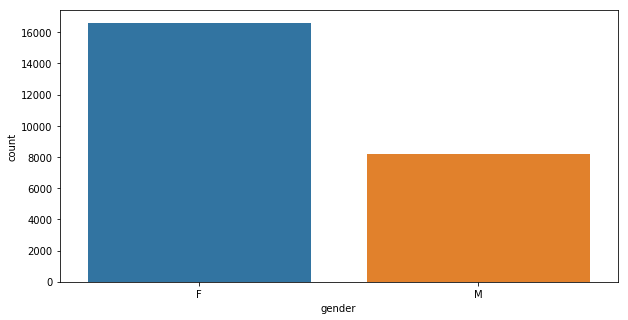

In [97]:
# 성별 분포
plt.figure(figsize=(10,5))
sns.countplot('gender',data=data)#여성이 더 많은 편이다.
plt.show()

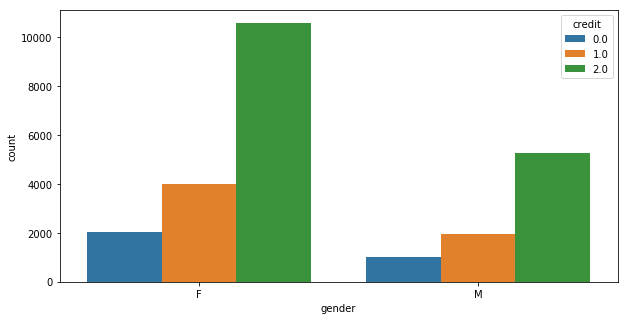

In [98]:
# 성별별 신용도 분포
plt.figure(figsize=(10,5))
sns.countplot('gender',hue='credit',data=data)
plt.show()
#남성과 여성 둘 다 2.0대가 높아 신용도가 낮은 편이다.
#하지만 주로 여성에서 많이 나타나는 편이다.

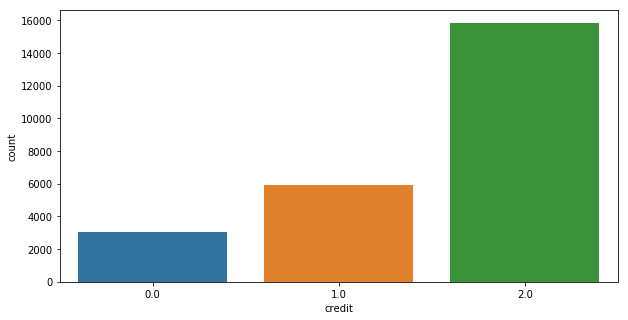

In [99]:
#신용도 그래프
plt.figure(figsize=(10,5))
sns.countplot('credit',data=data)
plt.show()
#2.0대 신용도가 많은 것으로 보아 신용도가 낮은 사람들이 많은 것으로 확인된다.

In [100]:
data.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       3446
family_size         0
begin_month         0
credit              0
employeed           0
age                 0
employed_year       0
dtype: int64

In [101]:
len(data)

24823

In [101]:
data['gender']=data['gender'].replace(['F','M'],[0,1])

In [102]:
df_test['gender']=df_test['gender'].replace(['F','M'],[0,1])

In [103]:
print('gender :')
print(data['gender'].value_counts())
print('------------') #여성:0,남성:1

gender :
0    16598
1     8225
Name: gender, dtype: int64
------------


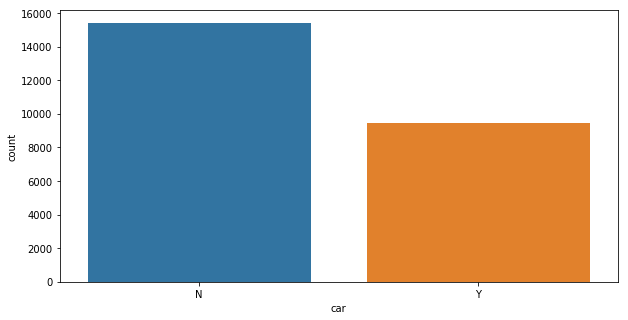

In [104]:
#차량 소지 여부
plt.figure(figsize=(10,5))
sns.countplot('car',data=data)
plt.show() #차량 미소지자가 많은 편이다.

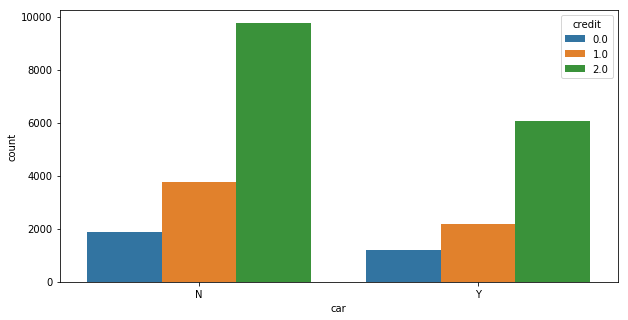

In [105]:
plt.figure(figsize=(10,5)) #차량 소지자별 신용도
sns.countplot('car',hue='credit',data=data)
plt.show()
#차를 소유하지 않은 사람들 중에 2.0대가 많은 것으로 보아 신용도가 낮은 사람들 중에서는
#차량을 소지하지 않는 것으로 드러났다.

In [106]:
print('Having a car or not : ')
data['car'] = data['car'].replace(['N','Y'],[0,1])
df_test['car'] = df_test['car'].replace(['N','Y'],[0,1])
print(data['car'].value_counts())
print('--------------')
#차량 소지하지 않은 사람이 많다.

Having a car or not : 
0    15403
1     9420
Name: car, dtype: int64
--------------


<Figure size 720x360 with 0 Axes>

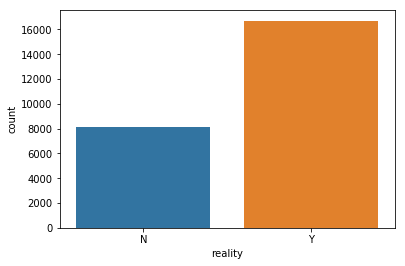

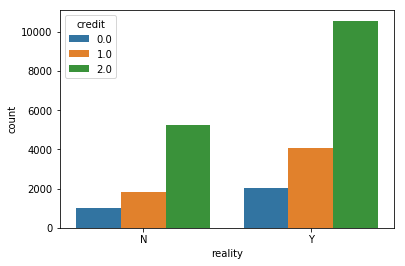

In [107]:
plt.figure(figsize=(10,5))
ax=plt.subplots()
ax=sns.countplot('reality',data=data)
ax2=plt.subplots()
ax2=sns.countplot('reality',hue='credit',data=data)
#부동산 소유자가 많은 편으로 credit은 2.0으로 갈수록 많다.

In [108]:
print('Having house reality or not: ')
data['reality'] = data['reality'].replace(['N','Y'],[0,1])
df_test['reality'] = df_test['reality'].replace(['N','Y'],[0,1])
print(data['reality'].value_counts())
print('--------------')#부동산 소유자들이 더 많다

Having house reality or not: 
1    16699
0     8124
Name: reality, dtype: int64
--------------


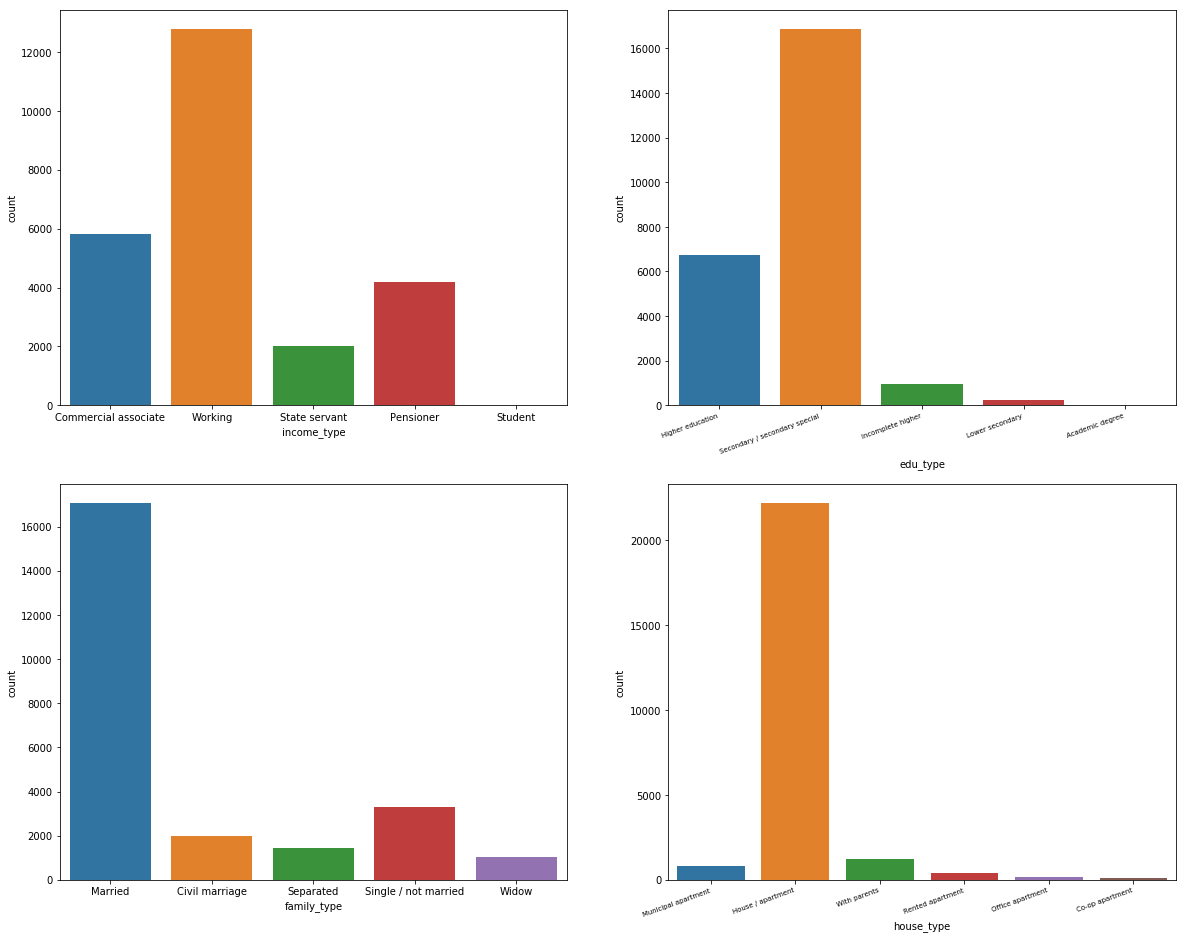

In [109]:
figure,((ax1,ax2),(ax3,ax4))=plt.subplots(nrows=2,ncols=2)
figure.set_size_inches(20,16)
g=sns.countplot(data=data, x="income_type",  ax=ax1)
g=sns.countplot(data=data, x="edu_type",  ax=ax2)
g.set_xticklabels(g.get_xticklabels(), rotation=20,
                  horizontalalignment='right',
                  fontweight='light',
                  fontsize='x-small'
                 )
g=sns.countplot(data=data, x="family_type", ax=ax3)
g=sns.countplot(data=data, x="house_type",ax=ax4)
g.set_xticklabels(g.get_xticklabels(), rotation=20,
                  horizontalalignment='right',
                  fontweight='light',
                  fontsize='x-small'
                 )
plt.show()

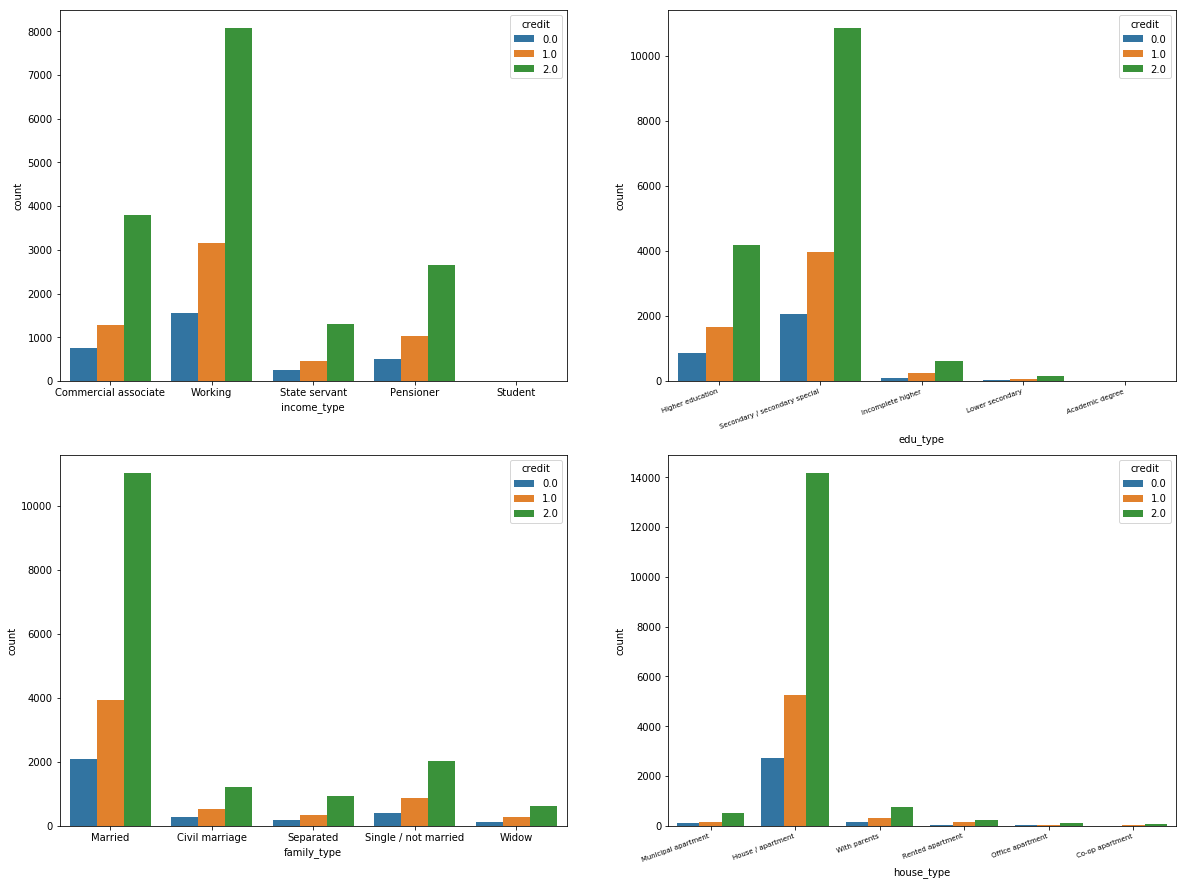

In [110]:
figure,((ax1,ax2),(ax3,ax4))=plt.subplots(nrows=2,ncols=2)
figure.set_size_inches(20,15)
sns.countplot(data=data, x="income_type", hue='credit', ax=ax1)
g=sns.countplot(data=data, x="edu_type", hue='credit',ax=ax2)
g.set_xticklabels(g.get_xticklabels(), rotation=20,
                  horizontalalignment='right',
                  fontweight='light',
                  fontsize='x-small'
                 )
sns.countplot(data=data, x="family_type",hue='credit', ax=ax3)
g=sns.countplot(data=data, x="house_type",hue='credit', ax=ax4)
g.set_xticklabels(g.get_xticklabels(), rotation=20,
                  horizontalalignment='right',
                  fontweight='light',
                  fontsize='x-small'
                 )
plt.show()
#회사원,중&고등학생,혼인,아파트에 사는 사람들이 신용도가 낮은 편이다.

In [111]:
print(data['income_type'].unique())
print(data['edu_type'].unique())
print(data['family_type'].unique())
print(data['house_type'].unique())

['Commercial associate' 'Working' 'State servant' 'Pensioner' 'Student']
['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
['Married' 'Civil marriage' 'Separated' 'Single / not married' 'Widow']
['Municipal apartment' 'House / apartment' 'With parents'
 'Rented apartment' 'Office apartment' 'Co-op apartment']


In [112]:
data.loc[data['DAYS_EMPLOYED']>0] #양수값일 경우 고용되지 않은 상태를 의미

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,work_phone,phone,email,occyp_type,family_size,begin_month,credit,employeed,age,employed_year
14,14,0,0,1,0,157500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,...,0,1,0,inocc,1.0,-41.0,2.0,0,62,365243.0
18,18,0,0,1,0,216000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,0,0,0,inocc,2.0,-37.0,2.0,0,63,365243.0
24,24,0,0,0,0,202500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,...,0,1,0,inocc,1.0,-5.0,2.0,0,61,365243.0
46,46,0,0,0,0,135000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,...,0,1,0,inocc,1.0,-24.0,2.0,0,57,365243.0
52,52,0,0,1,0,54000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,0,1,0,inocc,2.0,-37.0,2.0,0,65,365243.0
58,58,0,0,1,0,144000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,0,0,0,inocc,2.0,-23.0,2.0,0,63,365243.0
59,59,0,0,1,0,360000.0,Pensioner,Higher education,Married,House / apartment,...,0,1,0,inocc,2.0,-25.0,2.0,0,62,365243.0
60,60,1,1,1,0,112500.0,Pensioner,Secondary / secondary special,Separated,House / apartment,...,0,0,0,inocc,1.0,-1.0,1.0,0,58,365243.0
73,73,0,0,1,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,0,1,0,inocc,2.0,-34.0,2.0,0,63,365243.0
84,84,1,1,1,0,135000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,0,1,0,inocc,2.0,-27.0,2.0,0,64,365243.0


In [113]:
df_test.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,age,employeed
0,26457,1,1,0,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,...,365243,1,0,1,0,inocc,2.0,-60.0,60,0
1,26458,0,0,1,0,135000.0,State servant,Higher education,Married,House / apartment,...,-8671,1,0,1,0,Core staff,2.0,-36.0,51,1
2,26459,0,0,1,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,...,-217,1,1,1,0,Laborers,2.0,-40.0,43,1
3,26460,1,1,0,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,-2531,1,1,0,0,Drivers,2.0,-41.0,52,1
4,26461,0,1,1,0,225000.0,State servant,Higher education,Married,House / apartment,...,-9385,1,1,0,0,Managers,2.0,-8.0,48,1


In [114]:
#라벨화
label_encoder=preprocessing.LabelEncoder()
data['income_type']=label_encoder.fit_transform(data['income_type'])
df_test['income_type']=label_encoder.transform(df_test['income_type'])
#################################################################
data['edu_type']=label_encoder.fit_transform(data['edu_type'])
df_test['edu_type']=label_encoder.transform(df_test['edu_type'])
########################################################################
data['family_type']=label_encoder.fit_transform(data['family_type'])
df_test['family_type']=label_encoder.transform(df_test['family_type'])
########################################################################
data['house_type']=label_encoder.fit_transform(data['house_type'])
df_test['house_type']=label_encoder.transform(df_test['house_type'])
########################################################################

In [115]:
data['occyp_type'].unique()

array([nan, 'Laborers', 'Managers', 'Sales staff',
       'High skill tech staff', 'Core staff', 'Drivers', 'Medicine staff',
       'Accountants', 'inocc', 'Realty agents', 'Security staff',
       'Cleaning staff', 'Private service staff', 'Cooking staff',
       'Secretaries', 'IT staff', 'Low-skill Laborers',
       'Waiters/barmen staff', 'HR staff'], dtype=object)

In [116]:
data['FLAG_MOBIL'].value_counts()

1    24823
Name: FLAG_MOBIL, dtype: int64

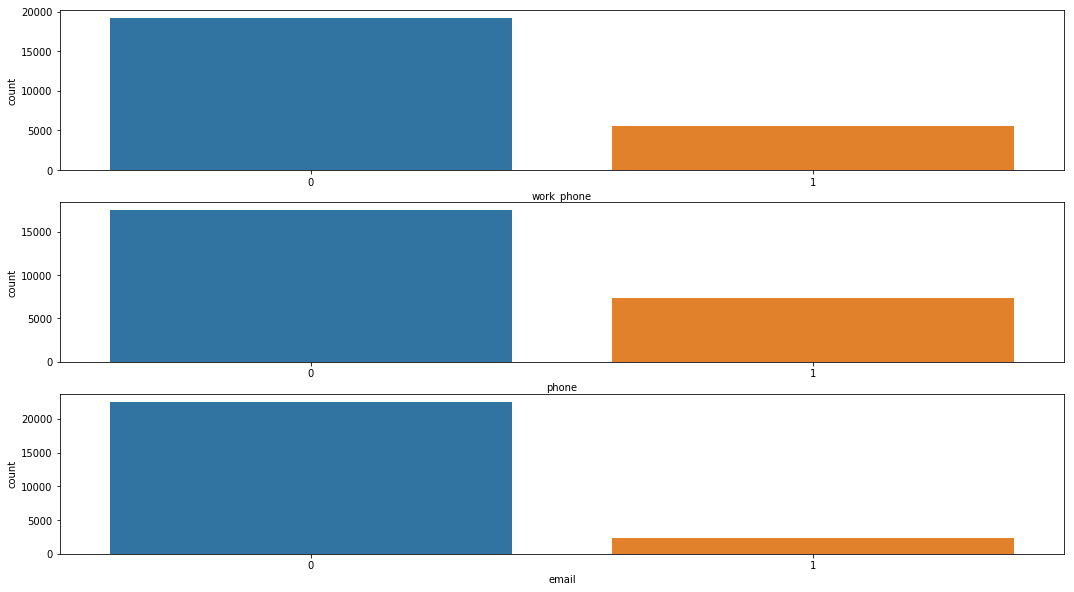

In [117]:
figure,(ax1,ax2,ax3)=plt.subplots(nrows=3,ncols=1)
figure.set_size_inches(18,10)
sns.countplot(data=data, x="work_phone", ax=ax1)
sns.countplot(data=data, x="phone", ax=ax2)
sns.countplot(data=data, x="email", ax=ax3)
plt.show()
#휴대폰 소유를 하고 업무용 전화,전화,이메일 소유는 적은 편이다.

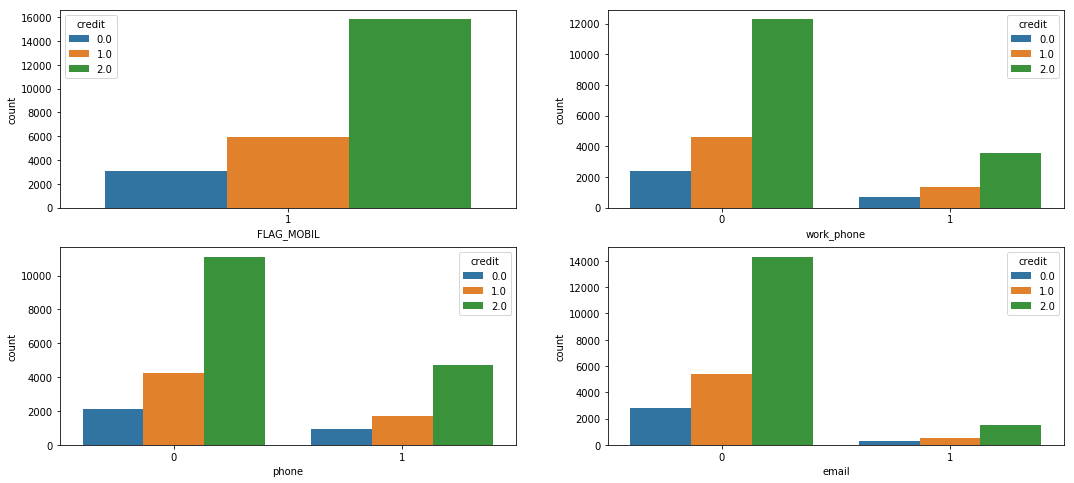

In [118]:
figure,((ax1,ax2),(ax3,ax4))=plt.subplots(nrows=2,ncols=2)
figure.set_size_inches(18,8)

sns.countplot(data=data, x="FLAG_MOBIL", hue='credit', ax=ax1)
#전원 휴대폰 소지,신용등급 낮은 편
sns.countplot(data=data, x="work_phone", hue='credit', ax=ax2)
sns.countplot(data=data, x="phone",hue='credit', ax=ax3)
sns.countplot(data=data, x="email",hue='credit', ax=ax4)
plt.show()
#업무용 전화 소유 여부가 많고 전화,이메일 소유하지 않은 사람 중에서 신용이 낮은 사람이 많다.

In [119]:
print('Having a phone or not: ')
print(data['phone'].value_counts())
print('--------------')
      
print('Having a email or not: ')
print(data['email'].value_counts())
print('--------------')
      
print('Having a work phone or not: ')
print(data['work_phone'].value_counts())
print('--------------')

Having a phone or not: 
0    17518
1     7305
Name: phone, dtype: int64
--------------
Having a email or not: 
0    22551
1     2272
Name: email, dtype: int64
--------------
Having a work phone or not: 
0    19232
1     5591
Name: work_phone, dtype: int64
--------------


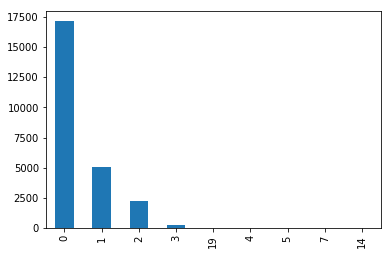

In [120]:
##연속형 변수(자녀 수)
data['child_num'].value_counts(sort=False).plot.bar()

In [121]:
#자녀가 2명 이상이면 2로 처리(보류)
data.loc[data['child_num'] >= 2,'child_num']=2
df_test.loc[df_test['child_num']>=2, 'child_num']=2

In [122]:
print(data['child_num'].value_counts())

0    17173
1     5070
2     2580
Name: child_num, dtype: int64


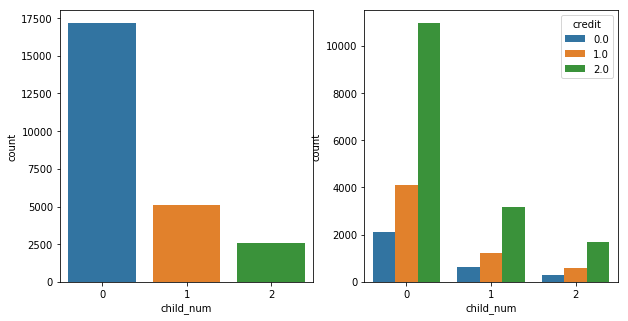

In [123]:
figure,(ax1,ax2)=plt.subplots(nrows=1,ncols=2)
figure.set_size_inches(10,5)
sns.countplot(data=data, x="child_num", ax=ax1)
sns.countplot(data=data, x="child_num",hue='credit',ax=ax2)
#자녀가 없는 회원이 제일 많고 그 중에서 신용등급이 제일 낮은 편이다.

In [124]:
print(data['gender'].value_counts())
print('--------------')

0    16598
1     8225
Name: gender, dtype: int64
--------------


In [125]:
df_test.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,age,employeed
0,26457,1,1,0,0,112500.0,1,4,0,1,...,365243,1,0,1,0,inocc,2.0,-60.0,60,0
1,26458,0,0,1,0,135000.0,2,1,1,1,...,-8671,1,0,1,0,Core staff,2.0,-36.0,51,1
2,26459,0,0,1,0,69372.0,4,4,1,1,...,-217,1,1,1,0,Laborers,2.0,-40.0,43,1
3,26460,1,1,0,0,112500.0,0,4,1,1,...,-2531,1,1,0,0,Drivers,2.0,-41.0,52,1
4,26461,0,1,1,0,225000.0,2,1,1,1,...,-9385,1,1,0,0,Managers,2.0,-8.0,48,1


In [126]:
plus_month=data.loc[data['begin_month']>=0]
plus_month['begin_month'].value_counts()
#begin_month은 0이 231임(신용카드 발급 상태 1달도 안됨)

0.0    218
Name: begin_month, dtype: int64

In [127]:
data['begin_year']=-data['begin_month']//12
data.head()#신용카드 발급한지 몇년?

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,phone,email,occyp_type,family_size,begin_month,credit,employeed,age,employed_year,begin_year
0,0,0,0,0,0,202500.0,0,1,1,2,...,0,0,NaN,2.0,-6.0,1.0,1,38,12.0,0.0
1,1,0,0,1,1,247500.0,0,4,0,1,...,0,1,Laborers,3.0,-5.0,1.0,1,31,4.0,0.0
2,2,1,1,1,0,450000.0,4,1,1,1,...,1,0,Managers,2.0,-22.0,2.0,1,52,12.0,1.0
3,3,0,0,1,0,202500.0,0,4,1,1,...,1,0,Sales staff,2.0,-37.0,0.0,1,41,5.0,3.0
4,4,0,1,1,0,157500.0,2,1,1,1,...,0,0,Managers,2.0,-26.0,2.0,1,41,5.0,2.0


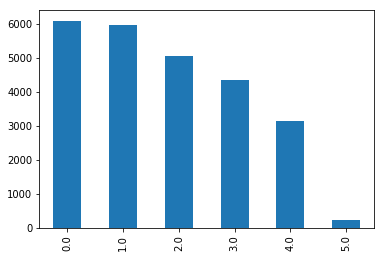

In [128]:
data['begin_year'].value_counts().plot(kind='bar')
#발급받은지 2년 이내가 많은 편이다.

In [129]:
data['begin_year'].value_counts()#4,5를 합치고 5개 구간으로 

0.0    6089
1.0    5964
2.0    5059
3.0    4347
4.0    3145
5.0     219
Name: begin_year, dtype: int64

In [130]:
print(data['begin_year'].value_counts(bins=5,sort=False))

(-0.006, 1.0]    12053
(1.0, 2.0]        5059
(2.0, 3.0]        4347
(3.0, 4.0]        3145
(4.0, 5.0]         219
Name: begin_year, dtype: int64


Text(0.5, 0, 'Age')

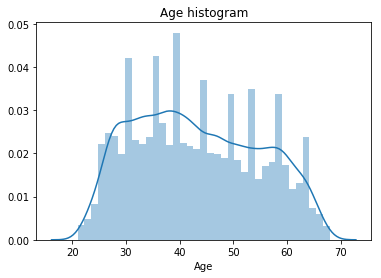

In [131]:
#신용카드를 사용한 사람들의 연령층
ax=plt.subplots()
ax=sns.distplot(data['age'],kde=True)
ax.set_title('Age histogram')
ax.set_xlabel('Age')
#20대 초반에서 60대 후반까지 분포한다.

In [132]:
print(data['age'].value_counts(bins=5,sort=False))

(20.951999999999998, 30.4]    4074
(30.4, 39.8]                  6448
(39.8, 49.2]                  6354
(49.2, 58.6]                  4814
(58.6, 68.0]                  3133
Name: age, dtype: int64


In [133]:
bins = list(range(20,80,10))
bins_label = [str(x)+"s" for x in bins]
print(bins_label)

['20s', '30s', '40s', '50s', '60s', '70s']


In [134]:
data.describe()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,work_phone,phone,email,family_size,begin_month,credit,employeed,age,employed_year,begin_year
count,24823.000000,24823.000000,24823.000000,24823.000000,24823.000000,2.482300e+04,24823.000000,24823.000000,24823.000000,24823.000000,...,24823.000000,24823.000000,24823.000000,24823.000000,24823.000000,24823.000000,24823.000000,24823.000000,24823.000000,24823.000000
mean,13510.331024,0.331346,0.379487,0.672723,0.412118,1.868772e+05,2.392297,3.096523,1.368126,1.283004,...,0.225235,0.294284,0.091528,2.198767,-26.055876,1.514442,0.832131,43.193893,61318.406276,1.724127
std,7633.215559,0.470707,0.485269,0.469229,0.670945,1.008704e+05,1.736393,1.341838,0.953264,0.948792,...,0.417745,0.455729,0.288364,0.919210,16.531935,0.704526,0.373757,11.522661,136509.611600,1.380843
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.700000e+04,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000,0.000000,21.000000,0.000000,0.000000
25%,6958.500000,0.000000,0.000000,0.000000,0.000000,1.215000e+05,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,2.000000,-39.000000,1.000000,1.000000,34.000000,3.000000,1.000000
50%,13646.000000,0.000000,0.000000,1.000000,0.000000,1.575000e+05,4.000000,4.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,2.000000,-24.000000,2.000000,1.000000,42.000000,6.000000,2.000000
75%,20156.500000,1.000000,1.000000,1.000000,1.000000,2.250000e+05,4.000000,4.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,3.000000,-12.000000,2.000000,1.000000,53.000000,15.000000,3.000000
max,26456.000000,1.000000,1.000000,1.000000,2.000000,1.575000e+06,4.000000,4.000000,4.000000,5.000000,...,1.000000,1.000000,1.000000,20.000000,0.000000,2.000000,1.000000,68.000000,365243.000000,5.000000


In [135]:
data['ages']=pd.cut(data['age'],bins, right=False, labels = bins_label[:-1])

In [136]:
data['ages'].unique()

[30s, 50s, 40s, 20s, 60s]
Categories (5, object): [20s < 30s < 40s < 50s < 60s]

In [137]:
#data.loc[(data['age']>=60),'ages']='60s'

In [137]:
data['ages'].value_counts()

30s    7127
40s    6354
50s    5356
20s    3395
60s    2591
Name: ages, dtype: int64

In [138]:
def make_bin(variable, n):#minus 변경하고 구간화
    df_train[variable]=-df_train[variable]
    df_test[variable]=-df_test[variable]
    count, bin_dividers =np.histogram(df_train[variable], bins=n) #train의 구간화를 적용
    bin_names=[str(i) for i in range(n)]
    df_train[variable]=pd.cut(x=df_train[variable], bins=bin_dividers, labels=bin_names, include_lowest=True)
    df_test[variable]=pd.cut(x=df_test[variable], bins=bin_dividers, labels=bin_names, include_lowest=True)
    df_test[variable].fillna(str(0), inplace=True) #test에는 없는 것을 임의의 값으로 채움
    ##########################################################
    df_train[variable]=label_encoder.fit_transform(df_train[variable])
    df_test[variable]=label_encoder.transform(df_test[variable])

In [139]:
data['ages']=label_encoder.fit_transform(data['ages'])

In [140]:
# df_train=df_train.drop(['begin_year','age'],axis=1)
# df_train.columns

### 결측치 회귀 대체

In [140]:
data['occyp_type'].unique()

array([nan, 'Laborers', 'Managers', 'Sales staff',
       'High skill tech staff', 'Core staff', 'Drivers', 'Medicine staff',
       'Accountants', 'inocc', 'Realty agents', 'Security staff',
       'Cleaning staff', 'Private service staff', 'Cooking staff',
       'Secretaries', 'IT staff', 'Low-skill Laborers',
       'Waiters/barmen staff', 'HR staff'], dtype=object)

In [141]:
data.columns

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'credit', 'employeed',
       'age', 'employed_year', 'begin_year', 'ages'],
      dtype='object')

In [142]:
x=data.dropna(axis=0)[['gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'family_size', 'begin_month','employeed']].values
print(len(x))
y=label_encoder.fit_transform(df_unique.dropna(axis=0)['occyp_type'])
print(len(y))

21377
21377


In [144]:
from sklearn import linear_model 
lin_reg = linear_model.LinearRegression()
lin_reg_model = lin_reg.fit(x, y)

x_test=data.loc[data['occyp_type'].isnull(),['gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'family_size', 'begin_month','employeed']].values
y_test=lin_reg.predict(x_test)

In [152]:
data.loc[data['occyp_type'].isnull(),'occyp_type']=np.trunc(y_test)#소수점 버림

In [153]:
data.isnull().sum()

index            0
gender           0
car              0
reality          0
child_num        0
income_total     0
income_type      0
edu_type         0
family_type      0
house_type       0
DAYS_BIRTH       0
DAYS_EMPLOYED    0
FLAG_MOBIL       0
work_phone       0
phone            0
email            0
occyp_type       0
family_size      0
begin_month      0
credit           0
employeed        0
age              0
employed_year    0
begin_year       0
ages             0
dtype: int64

In [154]:
data['occyp_type'].unique()

array([7.0, 'Laborers', 'Managers', 'Sales staff',
       'High skill tech staff', 'Core staff', 'Drivers', 6.0,
       'Medicine staff', 'Accountants', 'inocc', 'Realty agents', 8.0,
       'Security staff', 'Cleaning staff', 'Private service staff',
       'Cooking staff', 'Secretaries', 'IT staff', 'Low-skill Laborers',
       'Waiters/barmen staff', 'HR staff'], dtype=object)

In [155]:
y_encoded=label_encoder.inverse_transform(y)#라벨값을 원래대로 변환

In [156]:
print(y[190:230])

[ 0 14  8  0  1  4  3  6 18  3  3 14 18  8  8 14  3 18 14 18  0 14  3 18
 10 18  8  3 18  2 18 18  4  8  8 18  8  7 14  8]


In [157]:
y_encoded[190:230] #8:Laborers,7:IT staff,6:'High skill tech staff'

array(['Accountants', 'Sales staff', 'Laborers', 'Accountants',
       'Cleaning staff', 'Drivers', 'Core staff', 'High skill tech staff',
       'inocc', 'Core staff', 'Core staff', 'Sales staff', 'inocc',
       'Laborers', 'Laborers', 'Sales staff', 'Core staff', 'inocc',
       'Sales staff', 'inocc', 'Accountants', 'Sales staff', 'Core staff',
       'inocc', 'Managers', 'inocc', 'Laborers', 'Core staff', 'inocc',
       'Cooking staff', 'inocc', 'inocc', 'Drivers', 'Laborers',
       'Laborers', 'inocc', 'Laborers', 'IT staff', 'Sales staff',
       'Laborers'], dtype=object)

In [158]:
data.loc[data['occyp_type']==8.0,'occyp_type']='Laborers'

In [159]:
data.loc[data['occyp_type']==7.0,'occyp_type']='IT staff'
data.loc[data['occyp_type']==6.0,'occyp_type']='High skill tech staff'

In [160]:
data.columns

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'credit', 'employeed',
       'age', 'employed_year', 'begin_year', 'ages'],
      dtype='object')

In [161]:
df_test.columns

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'age', 'employeed'],
      dtype='object')

In [162]:
data['occyp_type'].value_counts()

Laborers                 5079
inocc                    4167
Core staff               2504
Sales staff              2382
IT staff                 2202
Managers                 2024
Drivers                  1489
High skill tech staff    1442
Accountants               838
Medicine staff            812
Cooking staff             433
Security staff            399
Cleaning staff            384
Private service staff     226
Waiters/barmen staff      118
Low-skill Laborers        115
Secretaries                94
Realty agents              58
HR staff                   57
Name: occyp_type, dtype: int64